# Proyecto: Análisis de mercado inmobiliario

En este proyecto se realiza un EDA a un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

## Problema

Ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, se propone crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga el precio de venta.

### 1. Pensando como un/a Data Scientist

1. ¿Qué datos nos podrían ayudar a trabajar en el problema?¿Por qué?

Considero que los datos que ayudarán a resolver este problema son los siguientes:

1.   **Tipo de vivienda:** Evidentemente, el precio depende de si el inmueble es una casa, apartamento, apartaestudio, etc.
1.   **Estrato:** La ubicación del inmueble también influye en el costo del mismo.
1.   **Área total:** El costo de un inmueble está relacionado con el área total (en metros cuadrados) del mismo.
1.   **Área construida:** El costo de un inmueble está relacionado con área construida (en metros cuadrados) del mismo.
1.   **Antigüedad:** La antigüedad del inmueble influye en el precio del mismo. Entre más nuevo, más costoso.
1.   **Número de habitaciones:** Se refiere a la cantidad total de ambientes que tiene un inmueble. Influye directamente en el precio del mismo.
1.   **Número de dormitorios:** Tanto completos (baño privado y closet) como simples. Influye directamente en el precio del inmueble.
1.   **Número de baños:** Tanto completos (con ducha y/o tina) como medios (sin ducha/tina).
1.   **Número de pisos (si aplica).** Un piso adicional aumenta el área construida (sin aumentar el área total) y número de habitaciones. Por tanto, influye directamente en el precio del inmueble.
1.   **Piso en el que se encuentra (si aplica)**. Si se trata de un apartamento, el piso en el que este se encuentra puede influir en el precio del mismo.

### 2. Análisis Exploratorio de Datos

En esta sección, realizamos un Análisis Exploratorio de Datos (EDA) sobre el dataset de propiedades de Properati. Es importante responder las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

**Comentarios sobre el dataset** 
1. Los datos con los que se trabajará tienen un *curado* inicial sobre el dataset que se puede descargar directamente de la página de Properati. Dicho dataset puede ser descargado en:

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



#### Importar librerías necesarias

In [ ]:
# IMPORTAMOS LAS 3 LIBRERÍAS NECESARIAS PARA TRABAJAR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [ ]:
# CARGAR EL DATASET
dataframe = pd.read_csv('/DS_Proyecto_01_Datos_Properati.csv')

In [ ]:
# NÚMERO DE FILAS Y COLUMNAS: Se usa el atributo shape del dataframe. Retorna una tupla. 0: rows, 1: cols
print(f'Número de filas: {dataframe.shape[0]}')
print(f'Número de columnas: {dataframe.shape[1]}')

Número de filas: 146660
Número de columnas: 19


In [ ]:
# CINCO PRIMERAS INSTANCIAS
dataframe.head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [ ]:
# Se usa el atributo columns del dataframe para mostrar los nombres de las columnas.
print(f'Columnas: {dataframe.columns}')

Columnas: Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')


In [ ]:
# Valores faltantes por columna haciendo uso de las funciones isna() y sum()
print(f'Valores faltantes por columna:')
print(dataframe.isna().sum())

Valores faltantes por columna:
start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [ ]:
# TIPOS DE PROPIEDAD: Obtiene los valores únicos de la columna property_type
tipos_de_propiedad = dataframe['property_type'].unique()
print('Tipos de propiedad:')
print(tipos_de_propiedad)
print('\n')
# SUMA: Imprime la cantidad de elementos en la lista tipos_de_propiedad
print('Suma:')
print(len(tipos_de_propiedad))

Tipos de propiedad:
['Departamento' 'PH' 'Casa' 'Lote' 'Casa de campo' 'Oficina' 'Otro'
 'Local comercial' 'Cochera' 'Depósito']


Suma:
10


In [ ]:
# INSTANCIAS POR CADA TIPO DE PROPIEDAD
instancias_por_propiedad = dataframe['property_type'].value_counts() # Retorna una serie ordenada.
# Usar lo anterior en lugar de: dataframe.value_counts(['property_type']) para poder hacer el barplot de forma más sencilla
# Source: https://www.kaggle.com/tejainece/seaborn-barplot-and-pandas-value-counts/comments

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html

# Otra forma: Cuenta y luego ordena
# instancias_por_propiedad = dataframe.groupby('property_type')['property_type'].count()
# tipos_propiedad_mas_abundantes = instancias_por_propiedad.sort_values(ascending=False) 
# La variable tipos_propiedad_mas_abundantes se usará en el punto 5

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_values.html


print(instancias_por_propiedad)
# Source: https://www.codementor.io/tips/3847022612/counting-number-of-occurrences-on-pandas-dataframe-columns

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64


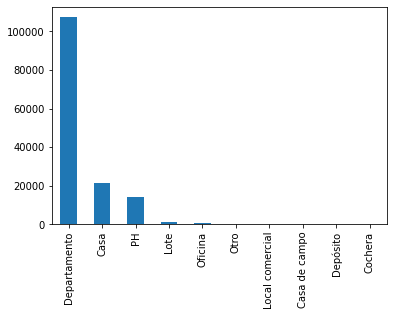

In [ ]:
# Gráfico de barras con pandas
dataframe['property_type'].value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


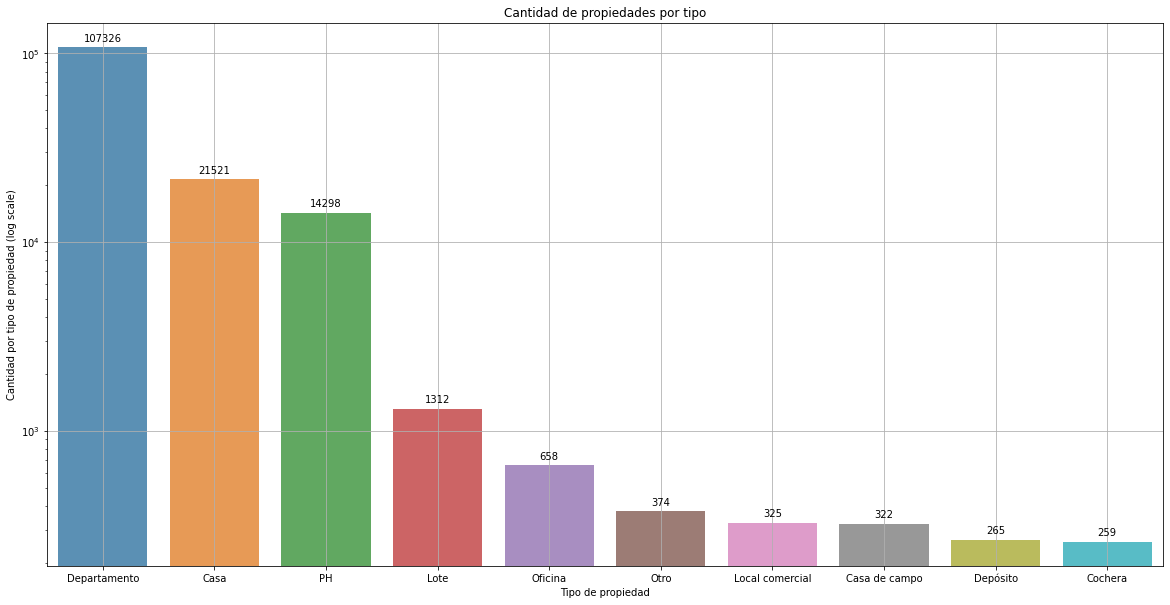

In [ ]:
## Gráfico de seaborn
# Establece el tamaño de la figura
plt.figure(figsize=(20,10))

# Gráfico de barras
figura = sns.barplot(instancias_por_propiedad.index, instancias_por_propiedad.values, alpha=0.8)
plt.title('Cantidad de propiedades por tipo')

## Eje X.
plt.xlabel('Tipo de propiedad')

## Eje Y.
# Escala logarítmica en el eje Y.
figura.set_yscale("log") # https://stackoverflow.com/questions/27019153/how-to-scale-seaborns-y-axis-with-a-bar-plot
plt.ylabel('Cantidad por tipo de propiedad (log scale)')

# Hacemos un loop a través de cada barra del objeto figura y usamos la función annotate() de matplotlib
# 1. Obtenemos la altura de la barra
# 2. Decidimos la ubicación del texto usando el ancho, alto y sus coordenadas.
for barra in figura.patches:
    figura.annotate(int(barra.get_height()), # altura de la barra
                   (barra.get_x() + barra.get_width() / 2., barra.get_height()), # (x,y)
                   ha = 'center', va = 'center', # Centra el texto
                   xytext = (0, 9), # Posición sobre la barra
                   textcoords = 'offset points') # Sistema de coordenadas

# https://datavizpyr.com/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html

# Activa el grid para una mejor visualización.
plt.grid()

# Show el plot
plt.show()

# Se evidencia una distribución similar al tipo Long Tail: https://en.wikipedia.org/wiki/Long_tail

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [ ]:
# Regiones l2
cantidad_por_region_l2 = dataframe['l2'].value_counts() # Retorna serie ordenada
# Es necesario hacerlo de esta manera porque .index devuelve un objeto multiindex
print(f'cantidad_por_region l2: {cantidad_por_region_l2}\n')

# Regiones l3
cantidad_por_region_l3 = dataframe['l3'].value_counts()
print(f'cantidad_por_region l3: {cantidad_por_region_l3}')

# Otra forma
#cantidad_por_region_l2 = dataframe.groupby('l2')['l2'].count() # Retorna serie no ordenada

cantidad_por_region: Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64

cantidad_por_region: Palermo            13073
Tigre               8718
Almagro             7527
Belgrano            6935
Caballito           6650
                   ...  
Cañuelas             108
Villa Soldati         69
Villa Riachuelo       42
Marcos Paz            35
Catalinas              5
Name: l3, Length: 89, dtype: int64


In [ ]:
dataframe.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [ ]:
## Otra forma de hacerlo

# # Regiones l2
# cantidad_por_region_l2 = dataframe.value_counts(['l2']) # Retorna serie ordenada
# # Es necesario hacerlo de esta manera porque .index devuelve un objeto multiindex
# regiones_l2 = [cantidad_por_region_l2.index[element][0] for element in range(len(cantidad_por_region_l2.index))]
# print(f'cantidad_por_region: {cantidad_por_region_l2}\n')
# # Otra forma
# #cantidad_por_region_l2 = dataframe.groupby('l2')['l2'].count() # Retorna serie no ordenada

# # Regiones l3
# cantidad_por_region_l3 = dataframe.value_counts(['l3'])
# regiones_l3 = [cantidad_por_region_l3.index[element][0] for element in range(len(cantidad_por_region_l3.index))]
# print(f'cantidad_por_region: {cantidad_por_region_l3}')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


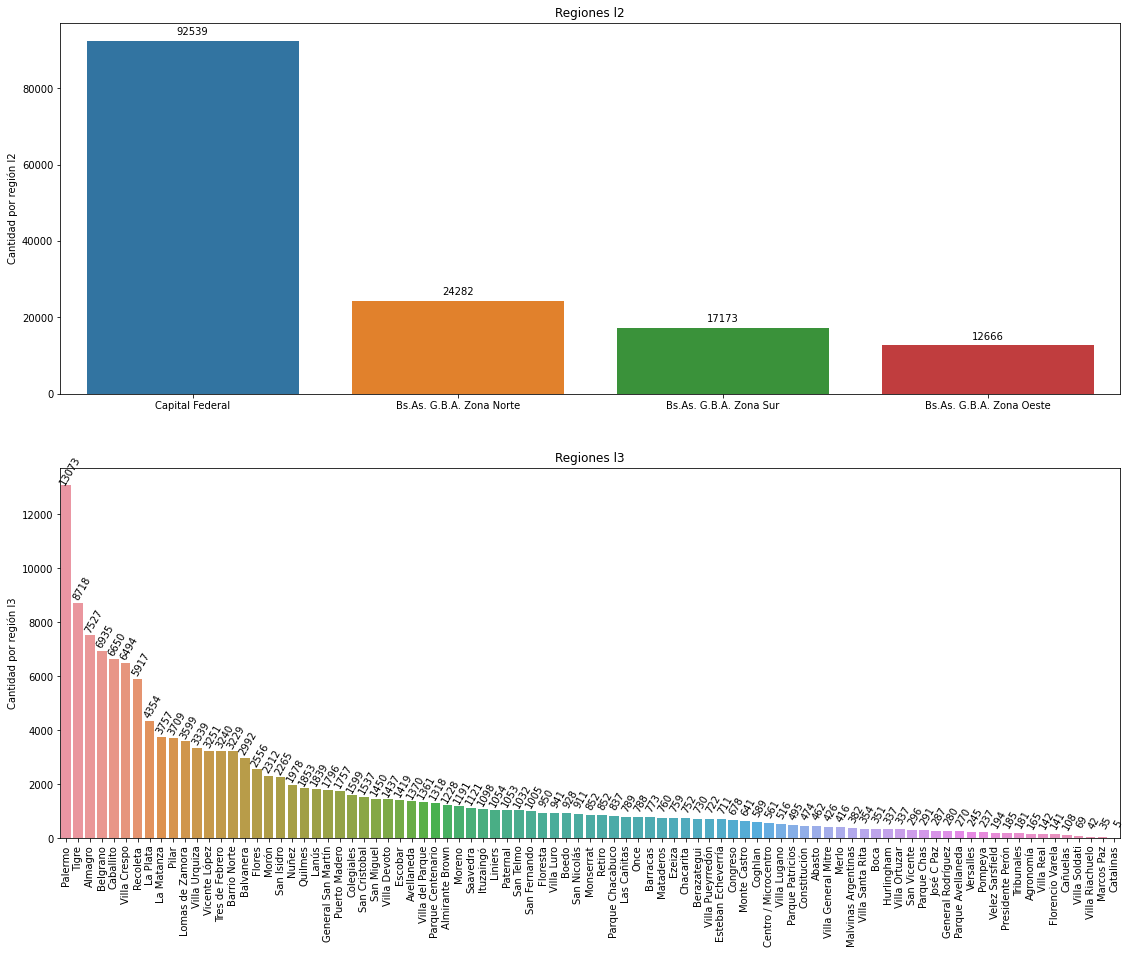

In [ ]:
# Grafico para la variable l2:
plt.figure(figsize=(19,15))

# Regiones l2
figura = plt.subplot(2, 1, 1)
sns.barplot(cantidad_por_region_l2.index, cantidad_por_region_l2.values)
plt.title('Regiones l2')
plt.ylabel('Cantidad por región l2')
# Texto sobre la barra
for barra in figura.patches:
    figura.annotate(int(barra.get_height()), # altura de la barra
                   (barra.get_x() + barra.get_width() / 2., barra.get_height()), # (x,y)
                   ha = 'center', va = 'center', # Centra el texto
                   xytext = (0, 9), # Posición sobre la barra
                   textcoords = 'offset points') # Sistema de coordenadas

# Regiones l3
figura = plt.subplot(2, 1, 2)
sns.barplot(cantidad_por_region_l3.index, cantidad_por_region_l3.values)
plt.xticks(rotation='vertical')
plt.title('Regiones l3')
plt.ylabel('Cantidad por región l3')
# Texto sobre la barra
for barra in figura.patches:
    figura.annotate(int(barra.get_height()), # altura de la barra
                   (barra.get_x() + barra.get_width() / 2. + 0.3, barra.get_height()+200), # (x,y)
                   ha = 'center', va = 'center', # Centra el texto
                   xytext = (0, 9), rotation=60,# Posición sobre la barra
                   textcoords = 'offset points') # Sistema de coordenadas

plt.show()

# https://www.w3schools.com/python/matplotlib_subplots.asp
# https://www.kite.com/python/answers/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [ ]:
# PARA TIPOS DE PROPIEDAD
# Seleccionamos los nombres de los tres tipos más abundantes
tres_tipos_mas_abundantes = instancias_por_propiedad.index[:3]
print(list(tres_tipos_mas_abundantes))
region_con_mas_publicaciones = cantidad_por_region_l2.index[0]
# Máscara para tipos y región
mask_tipos = (dataframe['property_type'].isin(tres_tipos_mas_abundantes) & (dataframe['l2'] == region_con_mas_publicaciones))

['Departamento', 'Casa', 'PH']


In [ ]:
df_filtro1 = dataframe[mask_tipos]
df_filtro1.shape

(91485, 19)

In [ ]:
# # OTRA FORMA UTILIZANDO: # regiones_l2 = [cantidad_por_region_l2.index[element][0] for element in range(len(cantidad_por_region_l2.index))]
# # Seleccionamos los nombres de los tres tipos más abundantes
# tres_tipos_mas_abundantes = [instancias_por_propiedad.index[element][0] for element in range(3)]
# region_con_mas_publicaciones = cantidad_por_region_l2.index[0][0]
# # Máscara para tipos y región
# mask_tipos = (dataframe['property_type'].isin(tres_tipos_mas_abundantes) & (dataframe['l2'] == cantidad_por_region_l2.index[0][0]))

# new_df = dataframe[mask_tipos]
# new_df.shape

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [ ]:
# Limpieza de NaN
df_filtro1 = df_filtro1.dropna(how='all')
df_filtro1.shape
# No hay NaN

(91485, 19)

In [ ]:
# Limpieza de duplicates
cantidad_de_duplicados = df_filtro1.duplicated(keep='first').sum()
print(f'Cantidad de duplicados: {cantidad_de_duplicados}')

# Drop duplicates: https://www.dataquest.io/blog/settingwithcopywarning/
with pd.option_context('mode.chained_assignment', None): # Evita el raise del warning debido al inplace=True
  df_filtro1.drop_duplicates(inplace=True)
print(df_filtro1.shape)

Cantidad de duplicados: 1611
(89874, 19)


In [ ]:
# Punto 1
df_filtro1.describe().iloc[:,2:]

# Count no tiene sentido porque es una suma de todas las instancias.

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,89874.000000,89874.000000,87727.000000,81157.000000,80850.000000,8.987400e+04
mean,2.965129,1.960456,1.558562,112.885494,95.169746,2.587195e+05
std,1.317503,1.074358,0.858386,989.133753,785.177443,3.190762e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.782000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


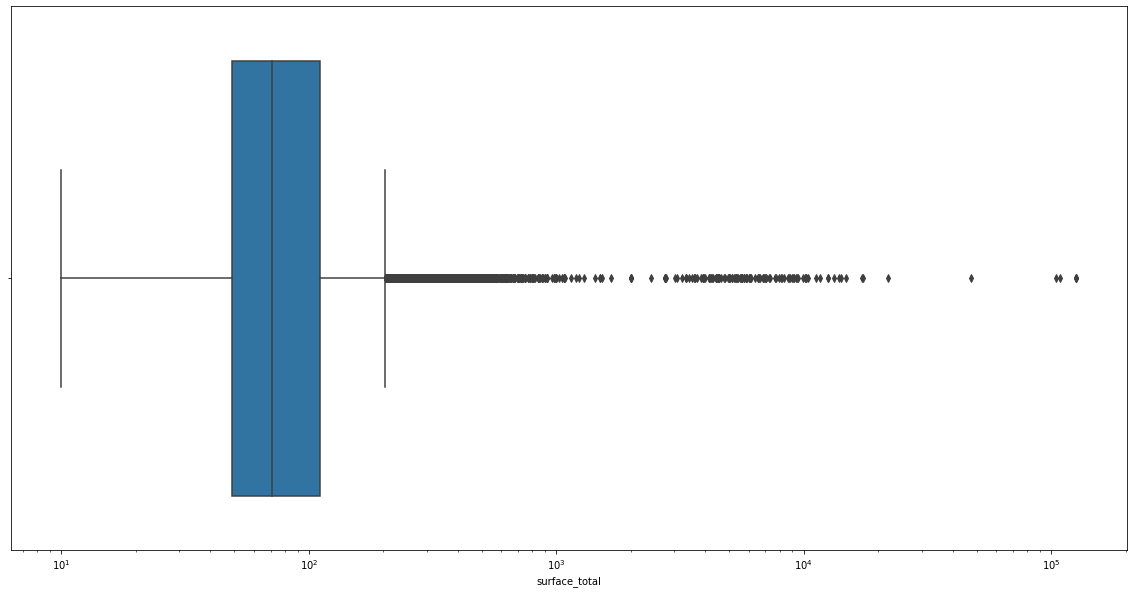

In [ ]:
# Punto 2 y 3:
plt.figure(figsize=(20,10))
sns.boxplot(x=df_filtro1["surface_total"])
plt.xscale('log')

In [ ]:
# Filtro 2: Filtrado de outliers: Grandes y pequeños: https://stackoverflow.com/questions/35827863/remove-outliers-in-pandas-dataframe-using-percentiles
instancias_antes_del_filtrado_iqr = df_filtro1.shape[0]

cols = ['surface_total']

Q1 = df_filtro1[cols].quantile(0.25)
Q3 = df_filtro1[cols].quantile(0.75)
IQR = Q3 - Q1

df_filtro2 = df_filtro1[~((df_filtro1[cols] < (Q1 - 1.5 * IQR)) | (df_filtro1[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

instancias_despues_del_filtrado_iqr = df_filtro2.shape[0]

In [ ]:
print(f'Cantidad de instancias eliminadas luego del filtrado iqr: {instancias_antes_del_filtrado_iqr - instancias_despues_del_filtrado_iqr}')
print(f'Cantidad de instancias después del filtrado: {instancias_despues_del_filtrado_iqr}')

Cantidad de instancias eliminadas luego del filtrado iqr: 6170
Cantidad de instancias después del filtrado: 83704


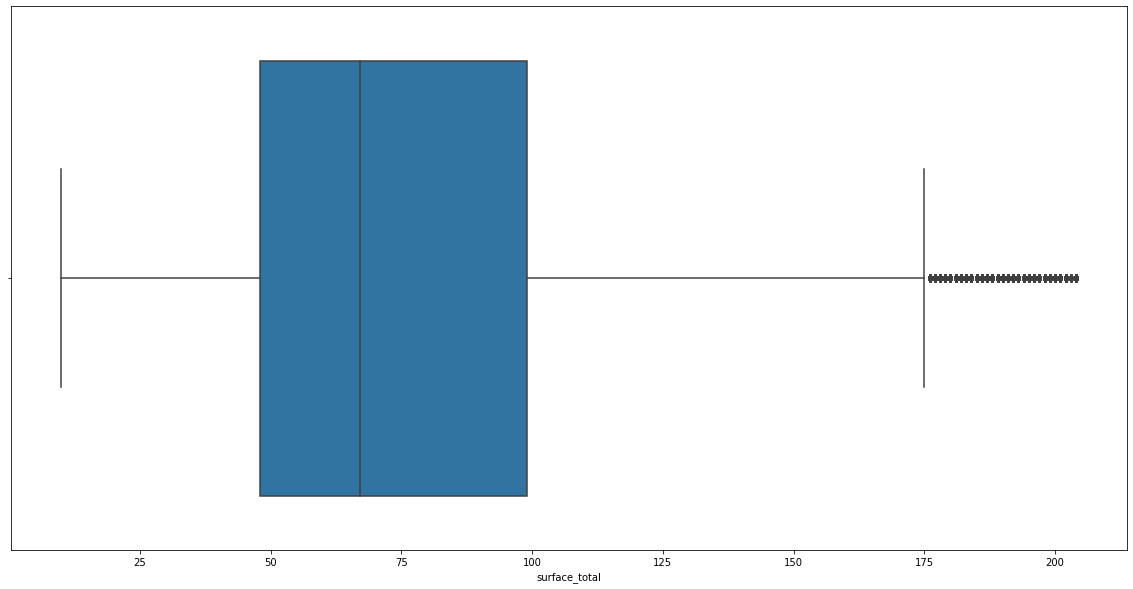

In [ ]:
# BoxPlot con outliers removidos (no todos)
plt.figure(figsize=(20,10))
sns.boxplot(x=df_filtro2["surface_total"])

In [ ]:
# Punto 4:
# Cantidad de instancias con surface_total por encima de 20000
cantidad = df_filtro2.loc[df_filtro2['surface_covered'] > df_filtro2['surface_total']].shape
print(f'Cantidad: {cantidad}')

print('Cuales son:')
df_filtro2.loc[df_filtro2['surface_covered'] > df_filtro2['surface_total']].head(1)

Cantidad: (674, 19)
Cuales son:


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
859,2019-04-25,2019-05-21,2019-04-25,-34.561805,-58.459579,Argentina,Capital Federal,Belgrano,3.0,2.0,1.0,43.0,44.0,133000.0,USD,Departamento 3 ambientes.Belgrano,Corredor Responsable: Gustavo Guastello - C.U....,Departamento,Venta


In [ ]:
df_filtro3 = df_filtro2.copy()

In [ ]:
# Filtro 3: Las propiedades con surface_covered mayor a surface_total fueron cambiadas por surface_total.
def compare_and_change(surface_covered,surface_total):
  if surface_covered > surface_total:
    return surface_total

df_filtro3['surface_covered'] = df_filtro3.apply(lambda x: compare_and_change(x['surface_covered'], x['surface_total']), axis=1)
cantidad = df_filtro3.loc[df_filtro3['surface_covered'] > df_filtro3['surface_total']].shape
print(f'Cantidad: {cantidad}')

Cantidad: (0, 19)


In [ ]:
# # Aprendiendo a usar apply y lambdas. IGNORAR ESTA PARTE

# prueba = {'col1': [1,7,3],
#           'col2': [9,1,7]}
# prueba_df = pd.DataFrame(prueba)
# prueba_df.head()

# def sum_values(col1,col2):
#   return col1 + col2

# prueba_df['col3'] = prueba_df.apply(lambda x: sum_values(x['col1'], x['col2']), axis=1)
# prueba_df.head()

# def compare_and_change(col1,col2):
#   if col1 < col2:
#     return col1

# prueba_df['col2'] = prueba_df.apply(lambda x: compare_and_change(x['col1'], x['col2']), axis=1)
# prueba_df.head()

# # 1. https://datascience.stackexchange.com/questions/56668/pandas-change-value-of-a-column-based-another-column-condition
# # 2. https://stackoverflow.com/questions/40506390/pandas-series-object-has-no-attribute-colnames-when-using-apply

In [ ]:
df_filtro3.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,NaN,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,NaN,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,NaN,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,NaN,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,NaN,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta


El precio minimo es: 6000.0
El precio maximo es: 32434232.0


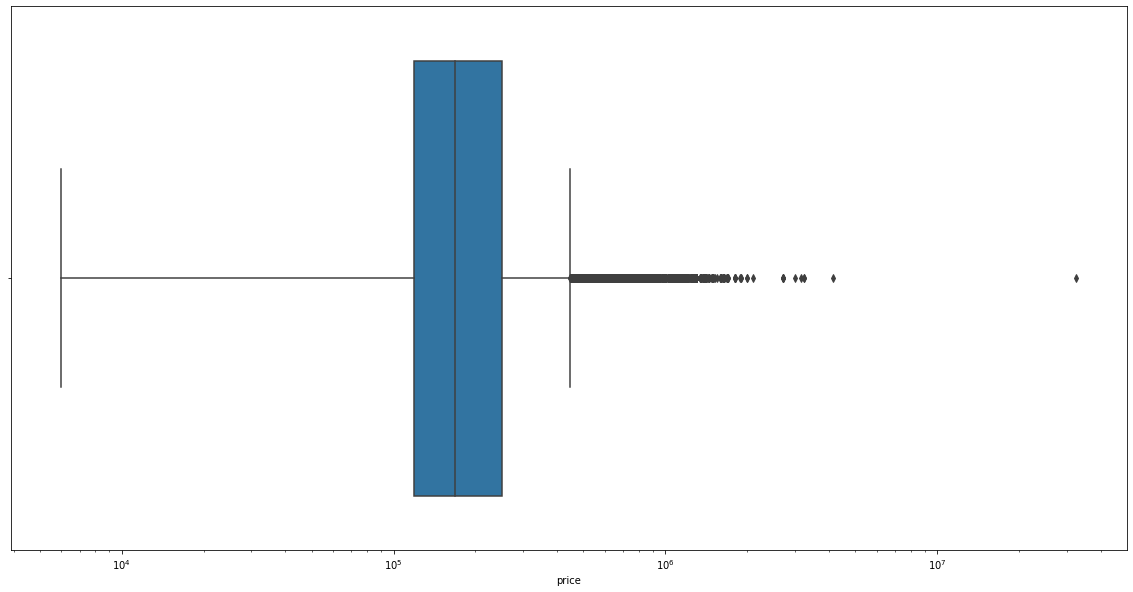

In [ ]:
# Punto 5: El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
# El precio minimo es $6_000 y el maximo es $32_434_232
minimo = df_filtro3['price'].min()
maximo = df_filtro3['price'].max()
print(f'El precio minimo es: {minimo}')
print(f'El precio maximo es: {maximo}')

plt.figure(figsize=(20,10))
sns.boxplot(x=df_filtro3["price"])
plt.xscale('log')

Cantidad de instancias eliminadas luego del filtrado iqr: 5551
Cantidad de instancias después del filtrado: 78153


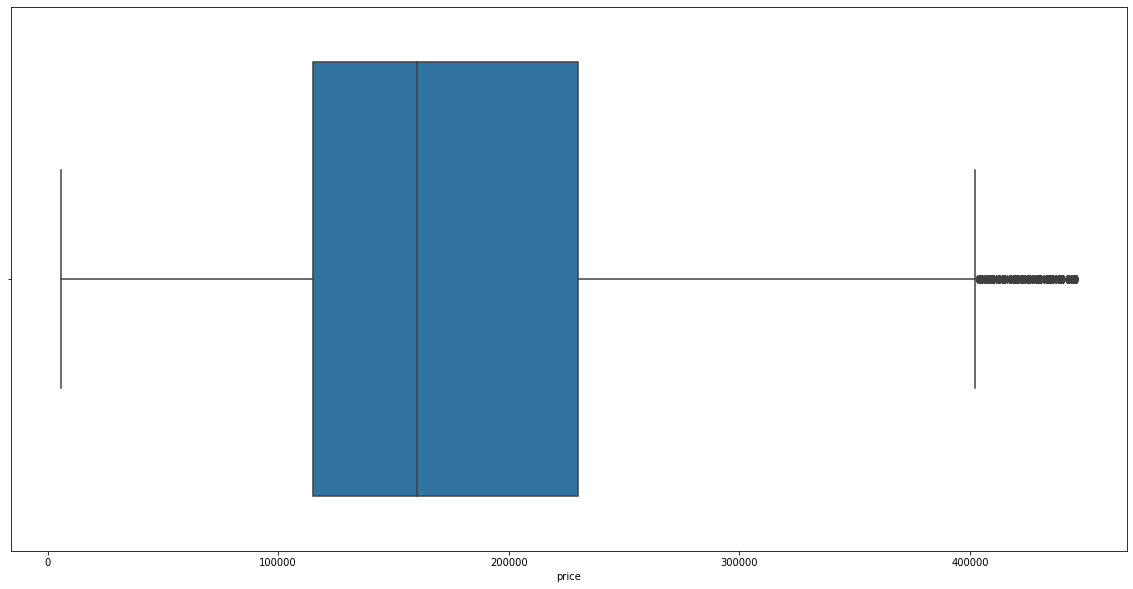

In [ ]:
# Filtro 4: Eliminación de outliers en precio.
instancias_antes_del_filtrado_iqr = df_filtro3.shape[0]

cols = ['price']

Q1 = df_filtro3[cols].quantile(0.25)
Q3 = df_filtro3[cols].quantile(0.75)
IQR = Q3 - Q1

df_filtro4 = df_filtro3[~((df_filtro3[cols] < (Q1 - 1.5 * IQR)) | (df_filtro3[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

instancias_despues_del_filtrado_iqr = df_filtro4.shape[0]
print(f'Cantidad de instancias eliminadas luego del filtrado iqr: {instancias_antes_del_filtrado_iqr - instancias_despues_del_filtrado_iqr}')
print(f'Cantidad de instancias después del filtrado: {instancias_despues_del_filtrado_iqr}')
# BoxPlot con outliers removidos (no todos)
plt.figure(figsize=(20,10))
sns.boxplot(x=df_filtro4["price"])

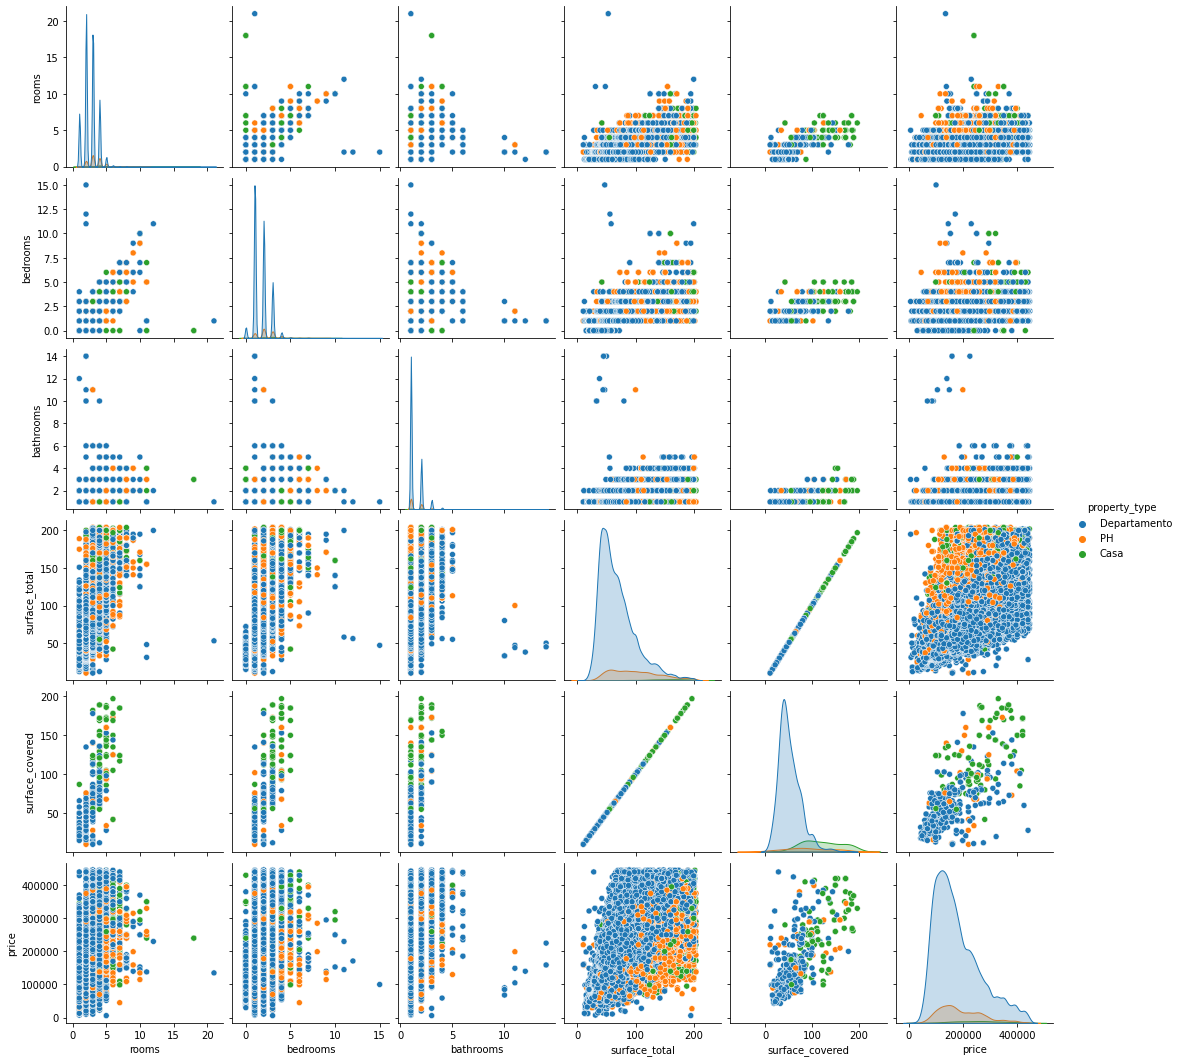

In [ ]:
sns.pairplot(
    df_filtro4,
    x_vars=['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price'],
    y_vars=['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price'],
    hue = 'property_type'
)

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [ ]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
mascara_de_variables = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']
correlaciones = df_filtro4[mascara_de_variables].corr()

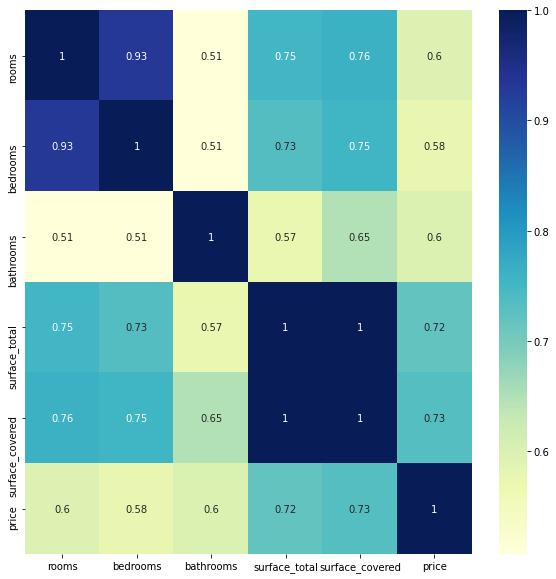

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlaciones, annot=True, cmap='YlGnBu')

In [ ]:
df_filtro4['property_type'].value_counts()

Departamento    68702
PH               8251
Casa             1200
Name: property_type, dtype: int64

Text(0.5, 1.0, 'Heatmap: Casa')

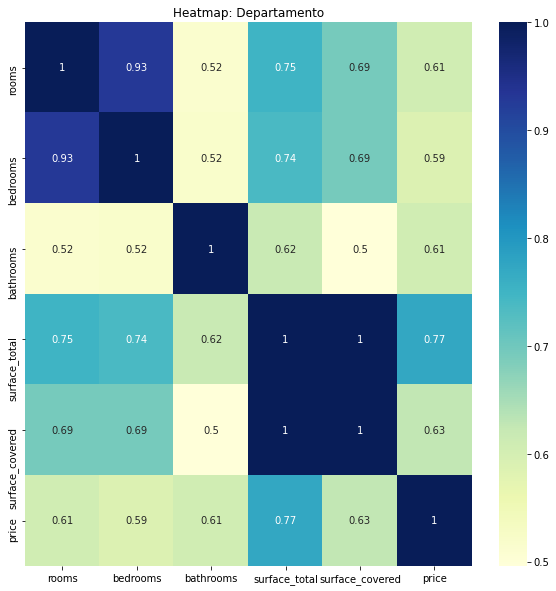

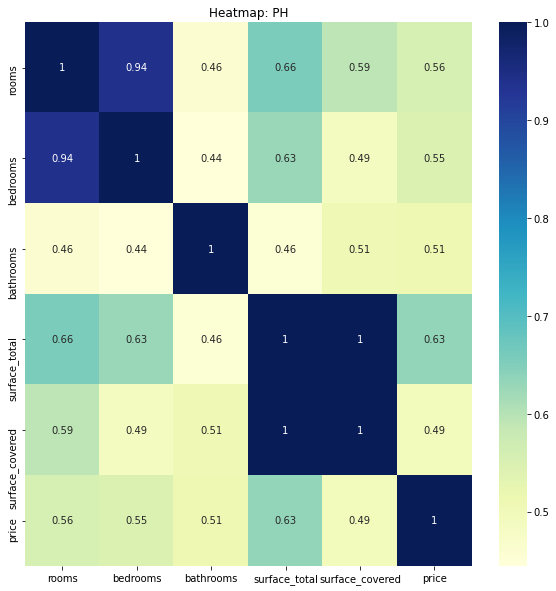

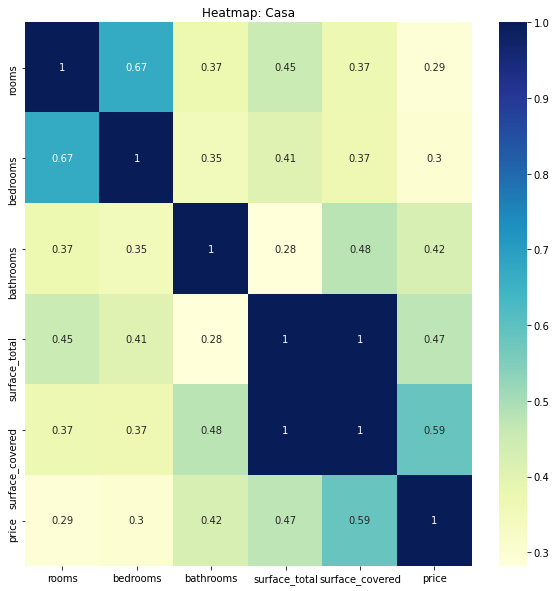

In [ ]:
# Correlaciones por tipos:

# Departamento
df_casa = df_filtro4.loc[df_filtro4['property_type'] == 'Departamento']
mascara_de_variables = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']
correlaciones = df_casa[mascara_de_variables].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlaciones, annot=True, cmap='YlGnBu')
plt.title('Heatmap: Departamento')

# PH
df_casa = df_filtro4.loc[df_filtro4['property_type'] == 'PH']
mascara_de_variables = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']
correlaciones = df_casa[mascara_de_variables].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlaciones, annot=True, cmap='YlGnBu')
plt.title('Heatmap: PH')

# Casa
df_casa = df_filtro4.loc[df_filtro4['property_type'] == 'Casa']
mascara_de_variables = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']
correlaciones = df_casa[mascara_de_variables].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlaciones, annot=True, cmap='YlGnBu')
plt.title('Heatmap: Casa')

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


In [ ]:
# Cual es la ciudad con la mayor cantidad de propiedades más económicas?

Q_10_perc = df_filtro4[cols].quantile(0.10) # Encontramos el valor máximo del primer decil: 88_125

# Cantidad de casas en el primer decil (10%) Price <= 88_125
cantidad_casas_mas_baratas = (df_filtro4['price'] <= Q_10_perc[0]).sum()
print(f'Cantidad de casas mas baratas: {cantidad_casas_mas_baratas}')

# Ciudades:
df_mas_baratas = df_filtro4.loc[df_filtro4['price'] <= 88_125]
print(df_mas_baratas['l3'].value_counts()[:5])

Cantidad de casas mas baratas: 7818
Balvanera        772
Almagro          594
San Cristobal    500
Caballito        465
Villa Crespo     455
Name: l3, dtype: int64



El barrio Balvanera tiene 772 propiedades baratas.

In [ ]:
df_Balvanera = df_filtro4.loc[df_filtro4['l3'] == 'Balvanera']
df_Balvanera.shape

(2790, 19)

Vemos que en Balvanera hay 2790 propiedades, de las cuales 772 son las más 
económicas.

De acuerdo a la distribución poblacional por estratos socioeconómicos, la población de la Comuna 3 es mayoritariamente de estrato medio. Sin embargo, se encuentra un elevado porcentaje de individuos de estrato bajo (14,0 %), el cual supera a la media encontrada en la Ciudad (11,3 %).
Lo cual podria ser motivo de los bajos precios de las propiedades.


Fuente: https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiD1_vp9NvvAhXaEVkFHXhfBaEQFjABegQIAxAD&url=http%3A%2F%2Fwww.ssplan.buenosaires.gov.ar%2Fdmdocuments%2Fcomuna_03.pdf&usg=AOvVaw2RgJC8JuOWWL84yHHKJydB


Veamos la distribución del precio de estas propiedades.


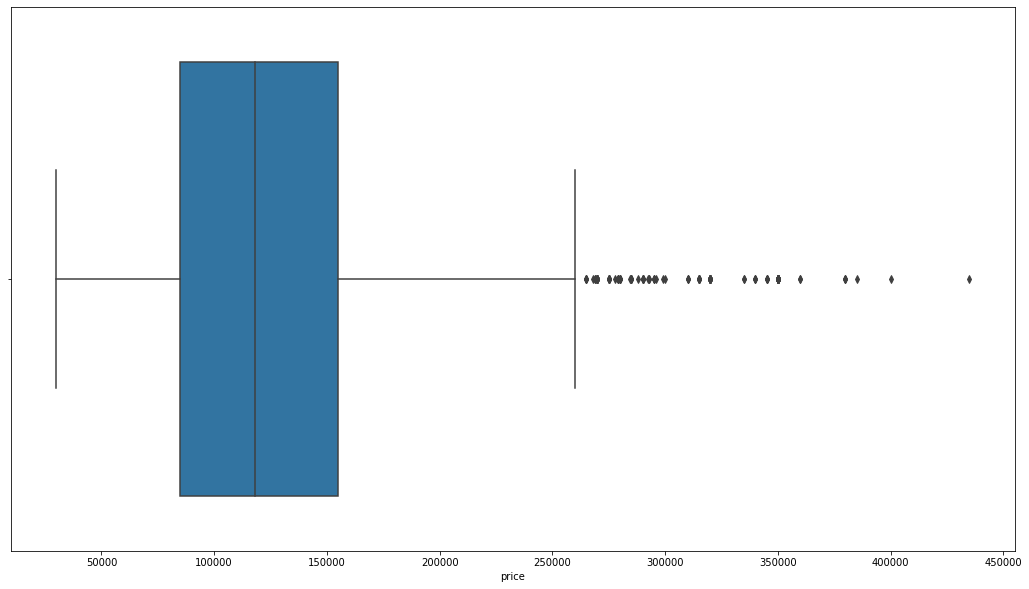

In [ ]:
plt.figure(figsize=(18,10))
sns.boxplot(x=df_Balvanera['price'])
plt.show()

In [ ]:
# Save Balvanera df
df_Balvanera.to_csv('Balvanera.csv',index=False)

In [ ]:
# https://stackoverflow.com/questions/63433405/colab-error-modulenotfounderror-no-module-named-geopandas
pip install geopandas

     |████████████████████████████████| 1.0MB 8.1MB/s 
     |████████████████████████████████| 6.5MB 26.2MB/s 
     |████████████████████████████████| 14.8MB 332kB/s 


In [ ]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [ ]:
df_Balvanera = pd.read_csv('Balvanera.csv')
df_Balvanera.shape

(2790, 19)

In [ ]:
# Drop lat and lon columns with NaN
# df_Balvanera.head()
df_Balvanera.isna().sum()
df_Balvanera2 = df_Balvanera.dropna(subset=['lat','lon'])
df_Balvanera2.shape

# Se eliminaron 109 instancias que no tenían lat o lon

start_date            0
end_date              0
created_on            0
lat                 109
lon                 109
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms           120
surface_total       494
surface_covered    2748
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

In [ ]:
# coordinate reference system (CRS)
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(df_Balvanera2.lon, df_Balvanera2.lat)]
geometry[:3]

In [ ]:
geo_df = gpd.GeoDataFrame(df_Balvanera2, crs=crs, geometry=geometry)
geo_df.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,geometry
1,2019-10-17,2019-11-01,2019-10-17,-34.601972,-58.397671,Argentina,Capital Federal,Balvanera,4.0,3.0,1.0,100.0,NaN,128000.0,USD,Departamento de 4 ambientes en Venta en Balvanera,Oportunidad Muy buen duplex de 4 ambientes con...,Departamento,Venta,POINT (-58.39767 -34.60197)
2,2019-10-17,2019-11-01,2019-10-17,-34.613641,-58.406910,Argentina,Capital Federal,Balvanera,4.0,3.0,1.0,56.0,NaN,140000.0,USD,Departamento de 4 ambientes en Venta en Balvanera,"Excelente departamento de 4 ambientes, al fren...",Departamento,Venta,POINT (-58.40691 -34.61364)
3,2019-03-04,2019-06-09,2019-03-04,-34.611117,-58.410230,Argentina,Capital Federal,Balvanera,2.0,1.0,1.0,46.0,NaN,92000.0,USD,"2 Ambientes, piso alto, todo luz, BALCON al fr...",Corredor Responsable: Veronica Grela Reina - C...,Departamento,Venta,POINT (-58.41023 -34.61112)
4,2019-03-04,2019-03-28,2019-03-04,-34.607495,-58.397663,Argentina,Capital Federal,Balvanera,1.0,1.0,1.0,54.0,NaN,115000.0,USD,Monoambiente divisible a estrenar - Balvanera,Corredor Responsable: Ariel Champanier - C.U.C...,Departamento,Venta,POINT (-58.39766 -34.60750)
5,2019-03-04,2019-07-29,2019-03-04,-34.606762,-58.394443,Argentina,Capital Federal,Balvanera,1.0,1.0,1.0,23.0,NaN,62000.0,USD,DEPARTAMENTO MONOAMBIENTE APTO PROFESIONAL!!!,Corredor Responsable: Ariel Champanier - CUCIC...,Departamento,Venta,POINT (-58.39444 -34.60676)


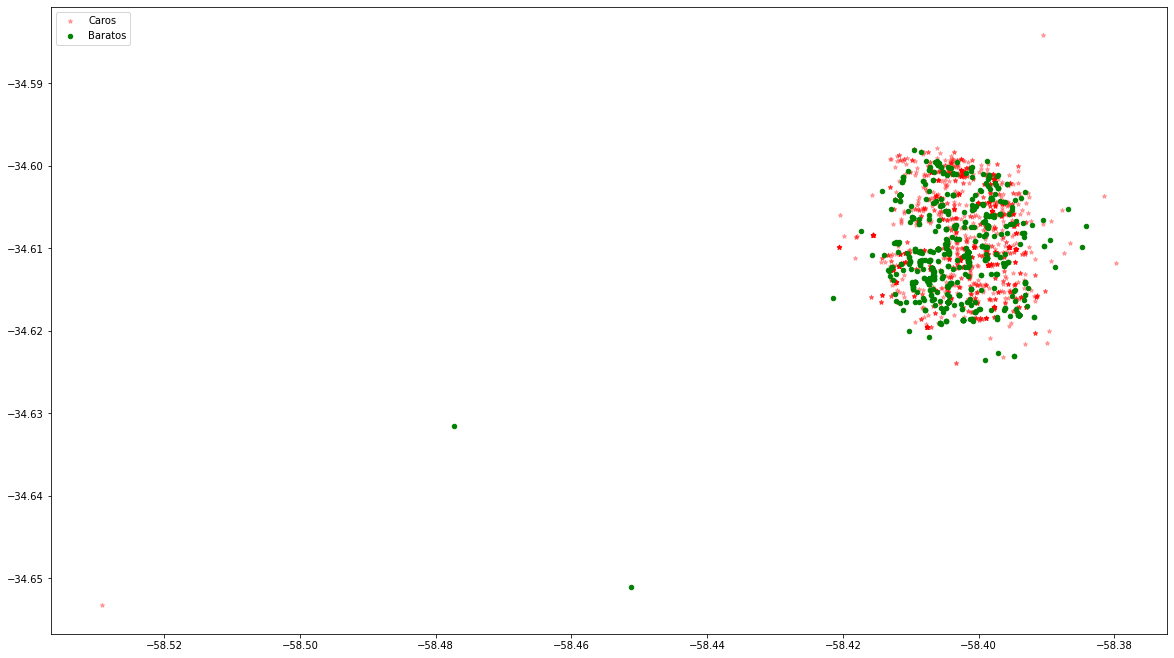

In [ ]:
# https://data.buenosaires.gob.ar/dataset/barrios/archivo/juqdkmgo-192-resource
# https://desktop.arcgis.com/es/arcmap/10.3/manage-data/shapefiles/geoprocessing-considerations-for-shapefile-output.htm

# street_map = gpd.read_file('/content/drive/MyDrive/barrios-zip/barrios_badata.shp')
# fig, ax = plt.subplots(figsize=(15,15))
# street_map.plot(ax=ax)
# https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972
fig, ax = plt.subplots(figsize=(20,15))
# street_map.plot(ax=ax, alpha=0.4)
geo_df[geo_df['price'] > Q_10_perc[0]].plot(ax=ax, markersize=20, color='red', label='Caros', marker='*', alpha=0.3)
geo_df[geo_df['price'] <= Q_10_perc[0]].plot(ax=ax, markersize=20, color='green', label='Baratos', marker='o')
plt.legend(loc='upper left')

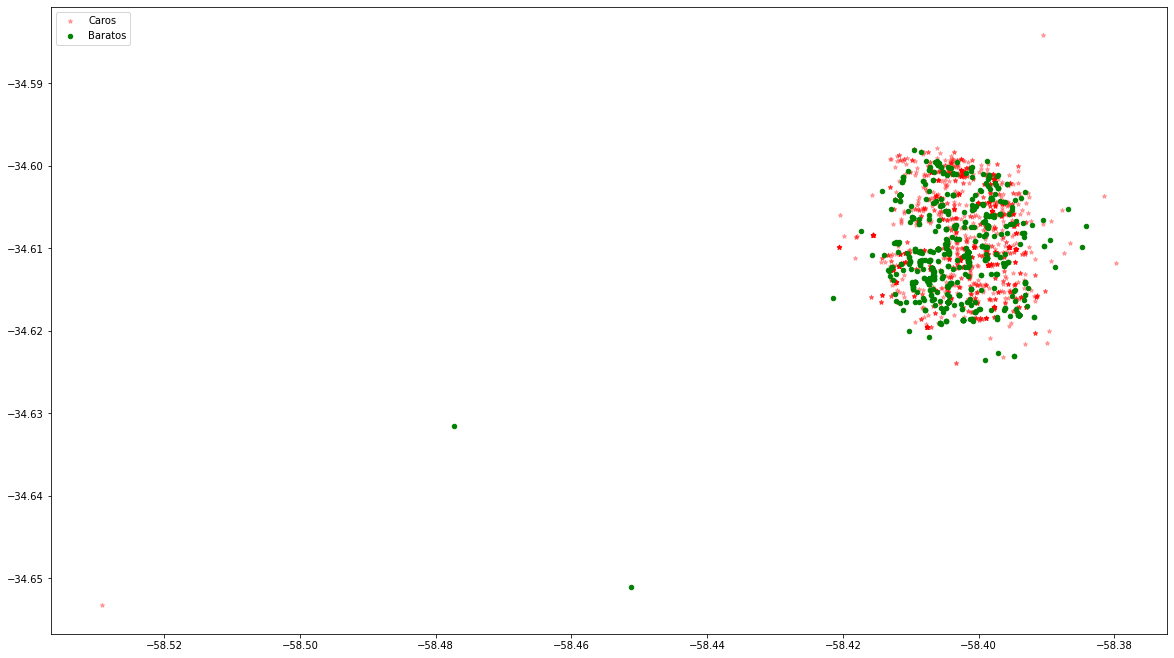

In [ ]:
# Plot de la distribución de propiedades. Basado en el posicionamiento, lon y lat.
fig, ax = plt.subplots(figsize=(20,15))
geo_df[geo_df['price'] > Q_10_perc[0]].plot(ax=ax, markersize=20, color='red', label='Caros', marker='*', alpha=0.3)
geo_df[geo_df['price'] <= Q_10_perc[0]].plot(ax=ax, markersize=20, color='green', label='Baratos', marker='o')
plt.legend(loc='upper left')

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [ ]:
# New df
tipos_de_propiedad_ml = ['Departamento', 'PH', 'Casa']
df_ml = dataframe.loc[(dataframe['l2'] == 'Capital Federal') & (dataframe['property_type'].isin(tipos_de_propiedad_ml)) & 
                      (dataframe['surface_total'] >= 15) & (dataframe['surface_total'] <= 1000) & (dataframe['price'] <= 4000000)]


In [ ]:
# 6 columns
df_ml2 = df_ml[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']].copy()
df_ml2.shape

(82373, 6)

In [ ]:
# Drop nan
df_ml_final = df_ml2.dropna().copy()
df_ml_final.shape

(81019, 6)

In [ ]:
df_ml_final.head(1)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0


## Librerias para realizar las regresiones

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings

## Benchmark
Usando 5 variables predictoras.

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 199173.83253528475
Raíz del error cuadrático medio en Test: 202449.36540361578


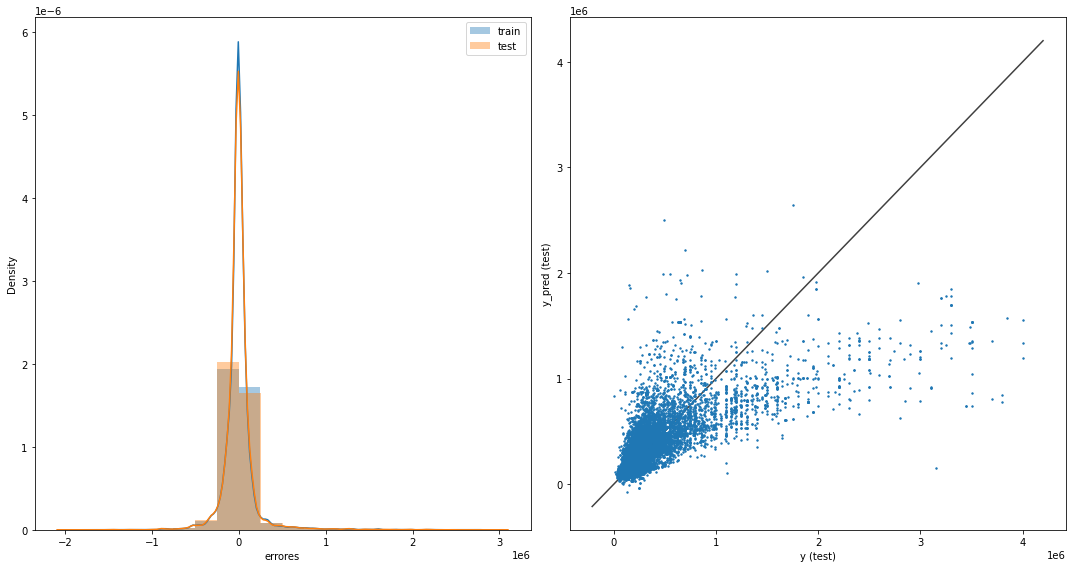

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 120797.5008434747
Raíz del error cuadrático medio en Test: 152950.67757423845


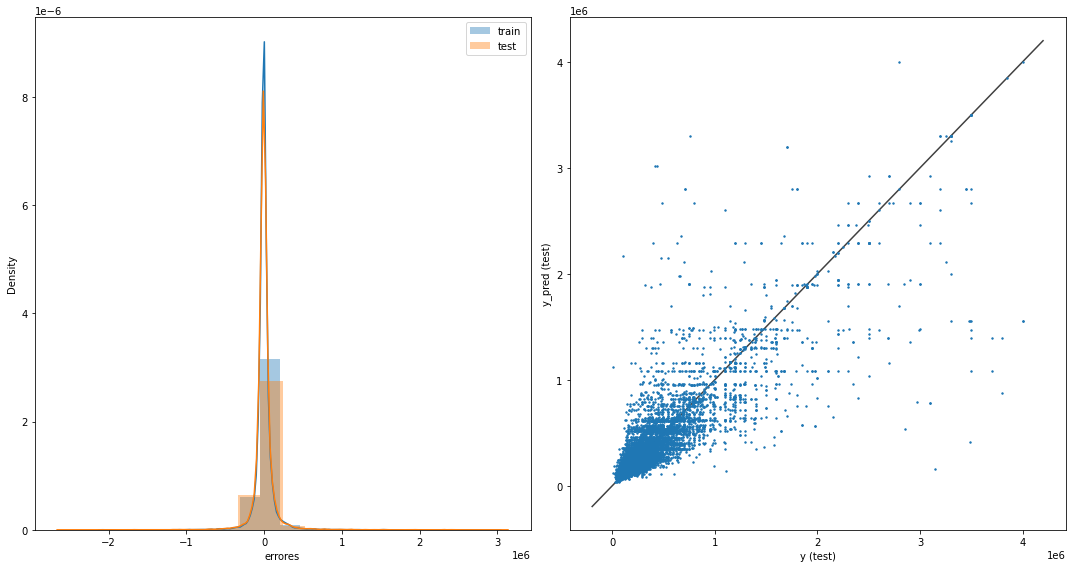

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 121300.24049431273
Raíz del error cuadrático medio en Test: 155040.1332898459


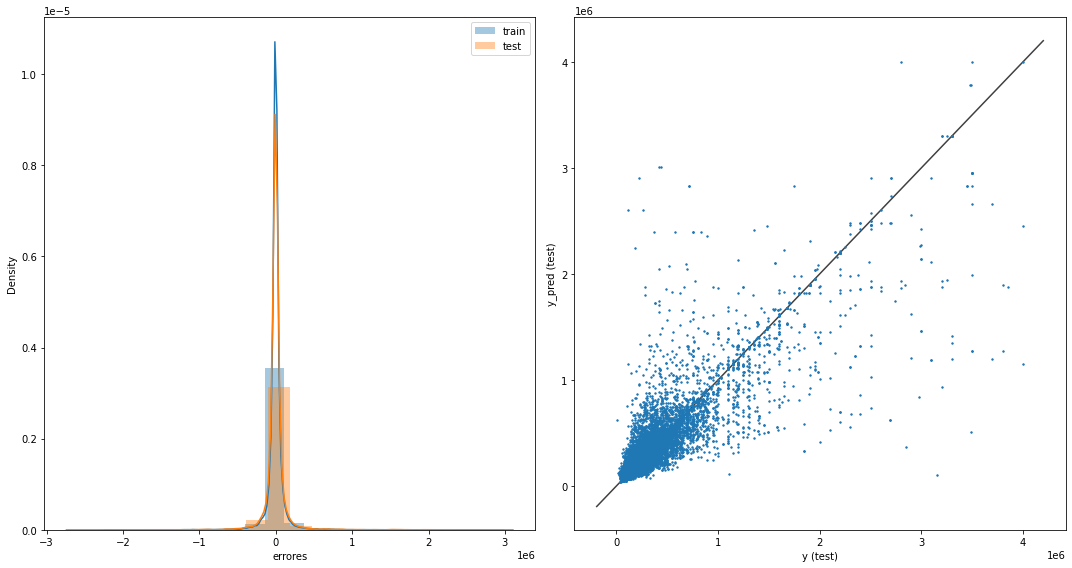

In [ ]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    # 5 Variables predictoras:
    X = df_ml_final.iloc[:,0:5].copy()
    y = df_ml_final.iloc[:,5].copy()

    # Instances
    linear_model = LinearRegression()
    tree_regressor = DecisionTreeRegressor(max_depth=10,random_state=42)
    knn_regressor = KNeighborsRegressor(n_neighbors=5)

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

    # Training
    linear_model.fit(X_train, y_train)
    tree_regressor.fit(X_train, y_train)
    knn_regressor.fit(X_train, y_train)


    modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

    for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        
        print(f'Modelo: {modelos[i]}')

        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
        print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
        
        plt.figure(figsize = (15,8))

        plt.subplot(1,2,1)
        sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
        sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
        plt.xlabel('errores')
        plt.legend()


        ax = plt.subplot(1,2,2)
        ax.scatter(y_test,y_test_pred, s=2)
        
        lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
        ]
        
        ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
        plt.xlabel('y (test)')
        plt.ylabel('y_pred (test)')
        
        plt.tight_layout()
        plt.show()

In [ ]:
a = df_ml_final.iloc[0,:-1].values.reshape(-1,1)

In [ ]:
a = df_ml_final.iloc[0,:-1].values
# a = a.values.reshape(-1,1)
a = [a.values for a in a]
print(a)

AttributeError: ignored

In [ ]:
linear_model.predict(a)

ValueError: ignored

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 260994.75629954675
Raíz del error cuadrático medio en Test: 265196.1772695276


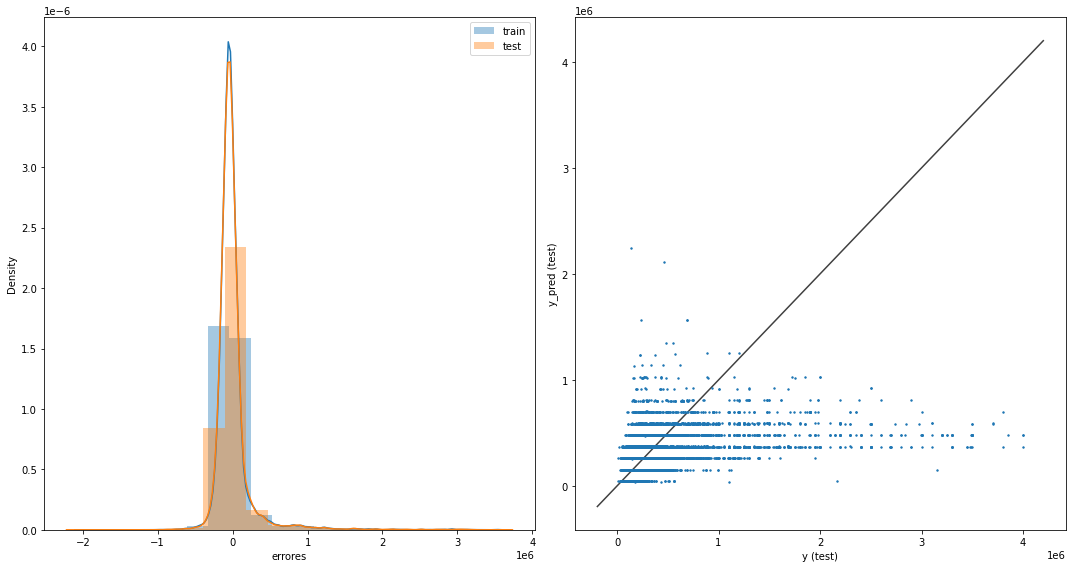

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 253567.54659475517
Raíz del error cuadrático medio en Test: 257463.63467676472


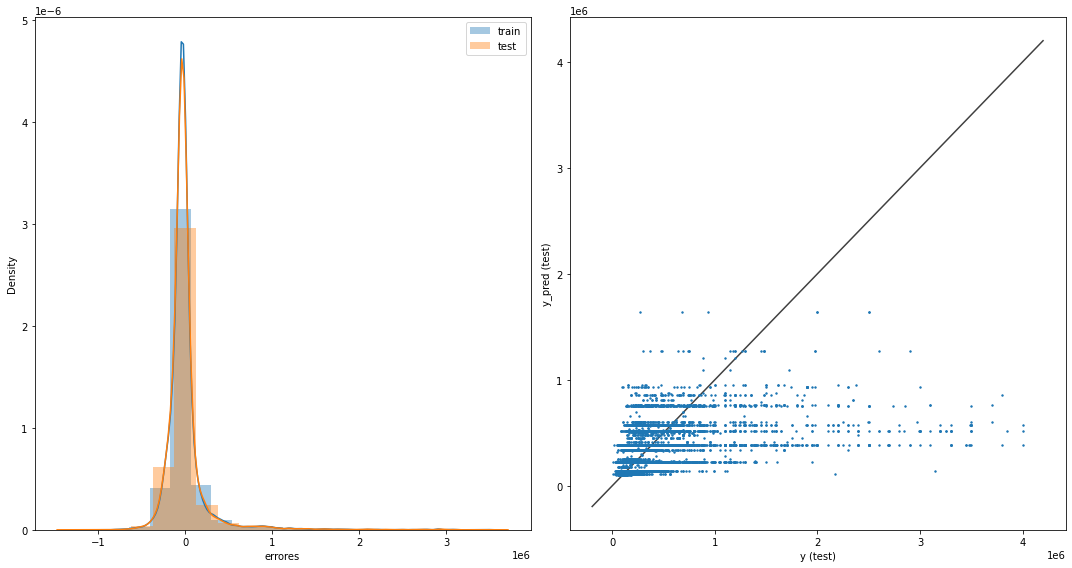

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 256703.6766148747
Raíz del error cuadrático medio en Test: 260221.6304169766


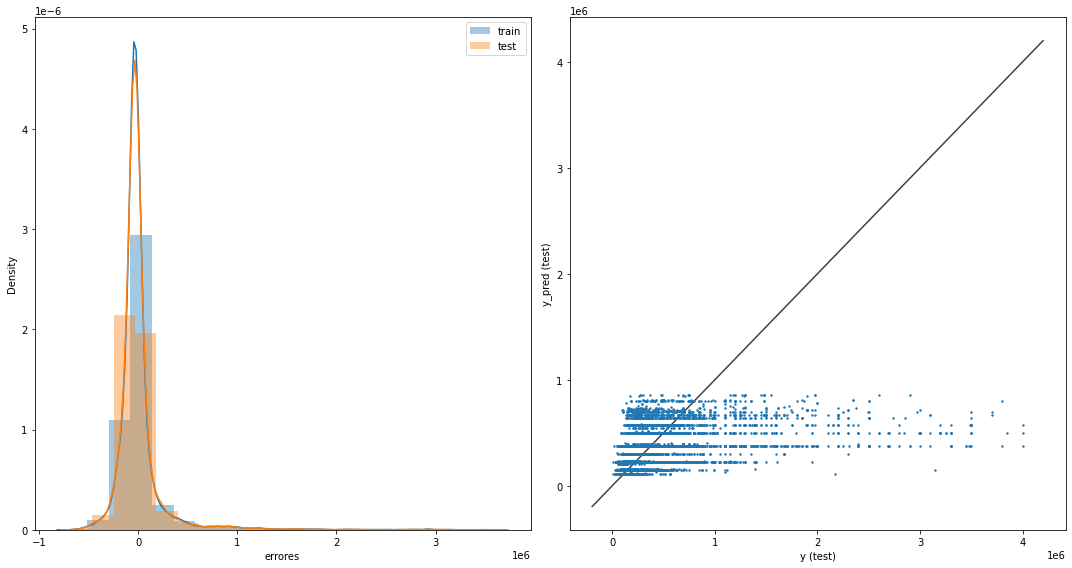

In [ ]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")

    # 2 Variables predictoras: rooms vs bedrooms
    X = df_ml_final.iloc[:,0:2].copy()
    y = df_ml_final.iloc[:,5].copy()

    # Instances
    linear_model = LinearRegression()
    tree_regressor = DecisionTreeRegressor(max_depth=10,random_state=42)
    knn_regressor = KNeighborsRegressor(n_neighbors=1000)

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

    # Training
    linear_model.fit(X_train, y_train)
    tree_regressor.fit(X_train, y_train)
    knn_regressor.fit(X_train, y_train)


    modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

    for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        
        print(f'Modelo: {modelos[i]}')

        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
        print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
        
        plt.figure(figsize = (15,8))

        plt.subplot(1,2,1)
        sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
        sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
        plt.xlabel('errores')
        plt.legend()


        ax = plt.subplot(1,2,2)
        ax.scatter(y_test,y_test_pred, s=2)
        
        lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
        ]
        
        ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
        plt.xlabel('y (test)')
        plt.ylabel('y_pred (test)')
        
        plt.tight_layout()
        plt.show()

In [ ]:
# # Testing

# aaa = [10,2,30]
# prueba_dict = {'col1': [4,2,3],
#                'col2': [-1,-2,-3],
#                'col3': [10,20,30]}
# prueba = pd.DataFrame(prueba_dict)
# prueba2 = prueba.loc[(prueba['col1'] >= 3) & (prueba['col3'] == aaa)]
# prueba2.head()

,col1,col2,col3
0,4,-1,10
1,2,-2,20
2,3,-3,30
